In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd

import scanpy as sc
import voyagerpy as vp
import seaborn as sns
import os
import pickle
from matplotlib.pyplot import imread
from collections import OrderedDict
import json

from matplotlib import pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [3]:
path_016 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_016um"
andata016_ = sc.read_visium(path=path_016)
andata016_

/gpfs/gsfs10/users/kanferg/conda/envs/voyagerpy_fork/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/voyagerpy_fork/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/voyagerpy_fork/lib/python3.8/site-packages/scanpy/readwrite.py:415: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positions = pd.read_csv(files["tissue_positions_file"], header=None)


AnnData object with n_obs × n_vars = 98917 × 19059
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
andata016_

AnnData object with n_obs × n_vars = 98917 × 19059
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [5]:
def print_all_keys(d, parent_key=''):
    if isinstance(d, dict) or isinstance(d, OrderedDict):
        for key, value in d.items():
            new_key = f"{parent_key}.{key}" if parent_key else key
            print(new_key)
            if isinstance(value, dict) or isinstance(value, OrderedDict):
                print_all_keys(value, new_key)

# Example usage with andata016_.uns
print_all_keys(andata016_.uns)

spatial
spatial.Visium_HD_Mouse_Brain
spatial.Visium_HD_Mouse_Brain.images
spatial.Visium_HD_Mouse_Brain.images.hires
spatial.Visium_HD_Mouse_Brain.images.lowres
spatial.Visium_HD_Mouse_Brain.scalefactors
spatial.Visium_HD_Mouse_Brain.scalefactors.spot_diameter_fullres
spatial.Visium_HD_Mouse_Brain.scalefactors.bin_size_um
spatial.Visium_HD_Mouse_Brain.scalefactors.microns_per_pixel
spatial.Visium_HD_Mouse_Brain.scalefactors.regist_target_img_scalef
spatial.Visium_HD_Mouse_Brain.scalefactors.tissue_lowres_scalef
spatial.Visium_HD_Mouse_Brain.scalefactors.fiducial_diameter_fullres
spatial.Visium_HD_Mouse_Brain.scalefactors.tissue_hires_scalef
spatial.Visium_HD_Mouse_Brain.metadata
spatial.Visium_HD_Mouse_Brain.metadata.chemistry_description
spatial.Visium_HD_Mouse_Brain.metadata.software_version


In [6]:
andata016_.obsm['spatial'] = np.array(andata016_.obsm['spatial'], dtype=np.float64)

In [7]:
sc.pp.filter_cells(andata016_, min_counts = 100)
sc.pp.filter_cells(andata016_, min_genes = 100)
andata016_

/gpfs/gsfs10/users/kanferg/conda/envs/voyagerpy_fork/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/voyagerpy_fork/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 98244 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [8]:
andata016_.var_names_make_unique()
andata016_.obsm['spatial'] = np.array(andata016_.obsm['spatial'], dtype=np.float64)
andata016_.uns['spatial']['img'] = andata016_.uns['spatial']['Visium_HD_Mouse_Brain'].pop("images")
andata016_.uns['spatial']['scale'] = andata016_.uns['spatial']['Visium_HD_Mouse_Brain'].pop("scalefactors")
andata016_.uns['spatial']['metadata'] = andata016_.uns['spatial']['Visium_HD_Mouse_Brain'].pop("metadata")
andata016_.uns['spatial'].pop("Visium_HD_Mouse_Brain")

print_all_keys(andata016_.uns)

spatial
spatial.img
spatial.img.hires
spatial.img.lowres
spatial.scale
spatial.scale.spot_diameter_fullres
spatial.scale.bin_size_um
spatial.scale.microns_per_pixel
spatial.scale.regist_target_img_scalef
spatial.scale.tissue_lowres_scalef
spatial.scale.fiducial_diameter_fullres
spatial.scale.tissue_hires_scalef
spatial.metadata
spatial.metadata.chemistry_description
spatial.metadata.software_version


<center> Load raw data (optional) </center>

```python
from matplotlib.backends.backend_pdf import PdfPages
path_016 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_016um"
andata016_ = sc.read_visium(path=path_016,count_file='raw_feature_bc_matrix.h5',source_image_path = "/Volumes/data/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_016um/spatial")


andata016_.obsm['spatial'] = np.array(andata016_.obsm['spatial'], dtype=np.float64)
andata016_.uns['spatial']['img'] = andata016_.uns['spatial']['Visium_HD_Mouse_Brain'].pop("images")
andata016_.uns['spatial']['scale'] = andata016_.uns['spatial']['Visium_HD_Mouse_Brain'].pop("scalefactors")
andata016_.uns['spatial']['metadata'] = andata016_.uns['spatial']['Visium_HD_Mouse_Brain'].pop("metadata")
andata016_.uns['spatial'].pop("Visium_HD_Mouse_Brain")

# change order of images
images = andata016_.uns['spatial'].pop('img')
images_hires = {'lowres':images['lowres'],'hires':images['hires']}
andata016_.uns['spatial']['img'] = images_hires
print_all_keys(andata016_.uns)

is_mt = andata016_.var_names.str.startswith('mt')
vp.utils.add_per_cell_qcmetrics(andata016_, subsets={'mito': is_mt})


spot_diameter_fullres = andata016_.uns['spatial']['scale'].pop('spot_diameter_fullres')
andata016_.uns['spatial']['scale']['spot_diameter_fullres'] = {'pxl_col_in_fullres':spot_diameter_fullres,'pxl_row_in_fullres':spot_diameter_fullres}
# insted of vp.spatial.get_visium_spots(andata016_, with_radius=False) I have done:
#scale = andata016_.uns['spatial']['scale']['tissue_lowres_scalef']
scale = 1
scale_dict = andata016_.uns["spatial"].get("scale", {})
spot_diam = scale_dict.get("spot_diameter_fullres")
visium_spots = gpd.GeoSeries.from_xy(andata016_.obsm['spatial'][:,0], andata016_.obsm['spatial'][:,1]).scale(scale, scale, origin=(0, 0))
_ = vp.spatial.set_geometry(andata016_, geom="spot_poly", values=visium_spots)
andata016_.uns['config'] = OrderedDict()
andata016_.uns["config"]["secondary_var_names"] = andata016_.var_names
pathout = "/data/kanferg/Sptial_Omics/VoyagerPy_fork/voyagerpy/out"

qc_features = ["sum", "detected", "subsets_mito_percent"]

with PdfPages(os.path.join(pathout, f'QC_Report_spatial_map_plot_.pdf')) as pdf:
    plt.rcParams['figure.dpi'] = 92
    plt.rcParams['font.family'] = ['serif']
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    
    def rm_xy(ax):
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig, axs = plt.subplots(3, 1, figsize=(6, 20))
    
    axs = axs.ravel()
    vp.plt.plot_spatial_feature(
        andata016_,
        features = qc_features[0],
        ncol = 1,
        image_kwargs=None,
        _ax  = axs[0]
    )
    
    vp.plt.plot_spatial_feature(
        andata016_,
        features = qc_features[1],
        ncol = 1,
        image_kwargs=None,
        _ax  = axs[1]
    )
    
    vp.plt.plot_spatial_feature(
        andata016_,
        features = qc_features[2],
         ncol = 1,
        image_kwargs=None,
        _ax  = axs[2]
    )
    fig.tight_layout()
    rm_xy(axs[0])
    rm_xy(axs[1])
    rm_xy(axs[2])
    
    plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.2)
    pdf.savefig()
    plt.close()




```

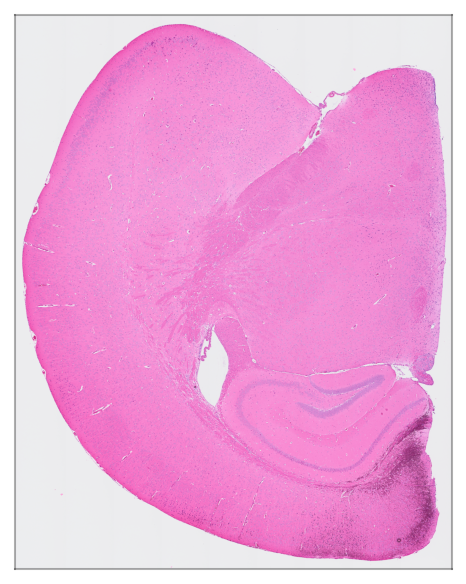

In [11]:
_ = vp.plt.imshow(andata016_,res = "hires")

<center><h3>Quality Control (QC)</h3>


In [9]:
is_mt = andata016_.var_names.str.startswith('mt')
vp.utils.add_per_cell_qcmetrics(andata016_, subsets={'mito': is_mt})

In [10]:
spot_diameter_fullres = andata016_.uns['spatial']['scale'].pop('spot_diameter_fullres')

In [11]:
scale = 1
scale_dict = andata016_.uns["spatial"].get("scale", {})
spot_diam = scale_dict.get("spot_diameter_fullres")
visium_spots = gpd.GeoSeries.from_xy(andata016_.obsm['spatial'][:,0], andata016_.obsm['spatial'][:,1]).scale(scale, scale, origin=(0, 0))


In [12]:
_ = vp.spatial.set_geometry(andata016_, geom="spot_poly", values=visium_spots)

In [13]:
andata016_.uns['config'] = OrderedDict()
andata016_.uns["config"]["secondary_var_names"] = andata016_.var_names

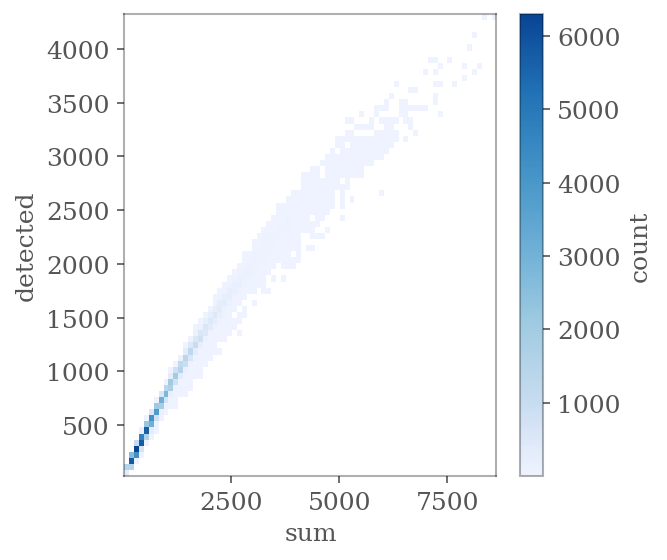

In [43]:
ax = vp.plotting.plot_barcodes_bin2d(
    andata016_,
    x='sum',
    y='detected',
    bins=76,
    figsize=(4, 4)
)

In [14]:
# The original count data
andata016_.layers['counts'] = andata016_.X.copy()
# Log-normalize the adata.X matrix
vp.utils.log_norm_counts(andata016_, inplace=True)
andata016_.layers['logcounts'] = andata016_.X.copy()

In [15]:
andata016_.layers['logcounts'].shape

(98244, 19059)

In [16]:
andata016_.obs['var'] = np.var(andata016_.X.todense(), axis=1)

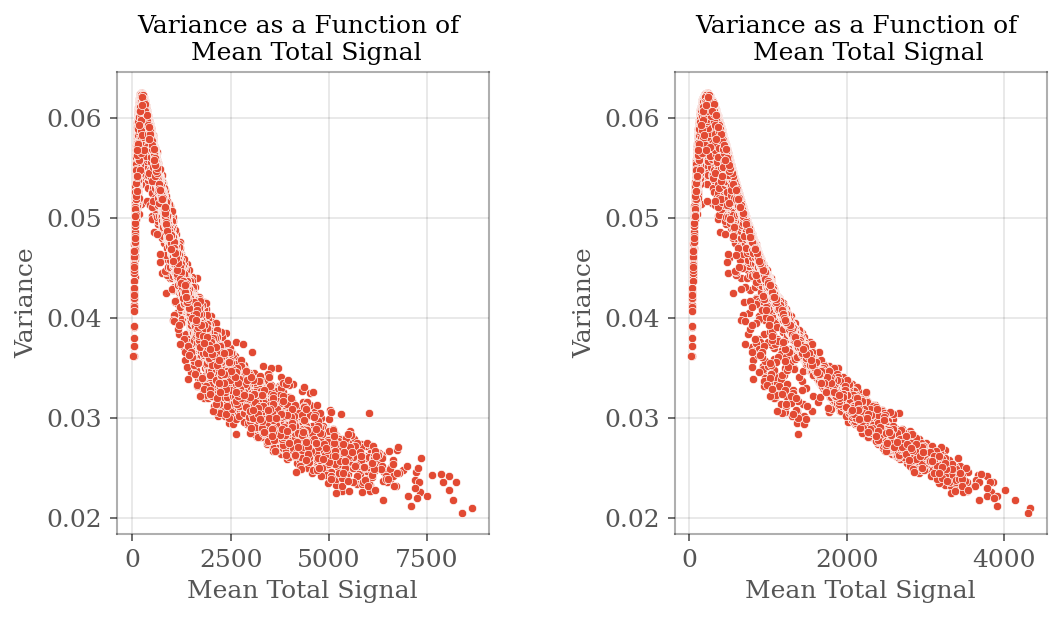

In [17]:
gene_means = andata016_.obs['sum']
var = andata016_.obs['var']

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(x=andata016_.obs['sum'], y=andata016_.obs['var'],ax = axs[0])
sns.scatterplot(x=andata016_.obs['detected'], y=andata016_.obs['var'],ax = axs[1])

# Set plot labels and title
axs[0].set_xlabel('Mean Total Signal')
axs[0].set_ylabel('Variance')
axs[0].set_title('Variance as a Function of \n Mean Total Signal')

axs[1].set_xlabel('Mean Total Signal')
axs[1].set_ylabel('Variance')
axs[1].set_title('Variance as a Function of \n  Mean Total Signal')
plt.subplots_adjust(wspace=0.5)

In [17]:
gene_var = vp.utils.model_gene_var(andata016_.layers['logcounts'], gene_names=andata016_.var_names)
hvgs = vp.utils.get_top_hvgs(gene_var)

andata016_.var['highly_variable'] = False
andata016_.var.loc[hvgs, 'highly_variable'] = True

andata016_.X = vp.utils.scale(andata016_.X, center=True)
sc.tl.pca(andata016_, use_highly_variable=True, n_comps=30, random_state=1337)
andata016_.X = andata016_.layers['logcounts'].copy()

In [18]:
andata016_

AnnData object with n_obs × n_vars = 98244 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'var'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable'
    uns: 'spatial', 'config', 'pca'
    obsm: 'spatial', 'geometry', 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'logcounts'

In [19]:
from leidenalg import ModularityVertexPartition
sc.pp.neighbors(
    andata016_,
    n_pcs=9,
    use_rep='X_pca',
    method='gauss',
    n_neighbors=80
)
sc.tl.leiden(
    andata016_,
    random_state=29,
    resolution=None,
    key_added='cluster',
    partition_type=ModularityVertexPartition
)

In [21]:
hvgs = vp.utils.get_top_hvgs(gene_var,n =100)

andata016_.var['highly_variable'] = False
andata016_.var.loc[hvgs, 'highly_variable'] = True

markers = vp.utils.find_markers(andata016_, hvg = True)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 14/14 [01:49<00:00,  7.82s/it]


In [22]:
andata016_.var

,gene_ids,feature_types,genome,highly_variable
Xkr4,ENSMUSG00000051951,Gene Expression,mm10,False
Rp1,ENSMUSG00000025900,Gene Expression,mm10,False
Sox17,ENSMUSG00000025902,Gene Expression,mm10,False
Lypla1,ENSMUSG00000025903,Gene Expression,mm10,False
Tcea1,ENSMUSG00000033813,Gene Expression,mm10,False
...,...,...,...,...
mt-Nd4,ENSMUSG00000064363,Gene Expression,mm10,False
mt-Nd5,ENSMUSG00000064367,Gene Expression,mm10,False
mt-Nd6,ENSMUSG00000064368,Gene Expression,mm10,True
mt-Cytb,ENSMUSG00000064370,Gene Expression,mm10,False


In [23]:
andata016_.var.index

Index(['Xkr4', 'Rp1', 'Sox17', 'Lypla1', 'Tcea1', 'Rgs20', 'Atp6v1h', 'Oprk1',
       'Npbwr1', 'Rb1cc1',
       ...
       'mt-Atp8', 'mt-Atp6', 'mt-Co3', 'mt-Nd3', 'mt-Nd4l', 'mt-Nd4', 'mt-Nd5',
       'mt-Nd6', 'mt-Cytb', 'Vamp7'],
      dtype='object', length=19059)

In [24]:
andata016_.var['symbol'] = andata016_.var['gene_ids'].values

In [25]:
marker_genes = [
    marker.sort_values(by='p.value').iloc[0].name
    for _, marker in sorted(markers.items())
]

marker_genes_symbols = andata016_.var.loc[marker_genes, "symbol"].tolist()
andata016_.var.loc[marker_genes, ["symbol"]]

,symbol
Plp1,ENSMUSG00000031425
Rora,ENSMUSG00000032238
Penk,ENSMUSG00000045573
Slc1a3,ENSMUSG00000005360
Hcn2,ENSMUSG00000020331
Ppp1r16b,ENSMUSG00000037754
Hpcal4,ENSMUSG00000046093
Nrgn,ENSMUSG00000053310
Scd1,ENSMUSG00000037071
Camk2a,ENSMUSG00000024617


In [27]:
andata016_.uns['config'] = OrderedDict()
andata016_.uns["config"]["secondary_var_names"] = andata016_.var_names

In [33]:
marker_genes[:6]

['Plp1', 'Rora', 'Penk', 'Slc1a3', 'Hcn2', 'Ppp1r16b']

In [32]:
_ = vp.plt.plot_expression(
    andata016_,
    marker_genes[:6],
    groupby='cluster',
    show_symbol=True,
    layer='logcounts',
    figsize=(9, 6),
    scatter_points=False
)

In [35]:
sc.pp.neighbors(
    andata016_,
    n_neighbors=20,
    n_pcs=9,
    use_rep='X_pca',
    knn=True,
    random_state=29,
    method='gauss', # one of umap, gauss, rapids
    metric='euclidean', # many metrics available,
    key_added='knn'
)

dist = andata016_.obsp['knn_distances'].copy()
dist.data = 1 / dist.data

# row normalize the matrix, this makes the matrix dense.
dist /= dist.sum(axis=1)

# convert dist back to sparse matrix
from scipy.sparse import csr_matrix
andata016_.obsp["knn_weights"] = csr_matrix(dist)

del dist

knn_graph = "knn_weights"

# adata.obsp["knn_connectivities"] represent the edges, while adata.opsp["knn_weights"] represent the weights
andata016_.obsp["knn_connectivities"] = (andata016_.obsp[knn_graph] > 0).astype(int)
vp.spatial.set_default_graph(andata016_, knn_graph)
vp.spatial.to_spatial_weights(andata016_, graph_name=knn_graph)

AnnData object with n_obs × n_vars = 98244 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'var', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'symbol'
    uns: 'spatial', 'config', 'pca', 'neighbors', 'leiden', 'knn'
    obsm: 'spatial', 'geometry', 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities', 'knn_distances', 'knn_connectivities', 'knn_weights'

In [36]:
qc_features = ["sum", "detected", "subsets_mito_percent"]
morans = vp.spatial.moran(andata016_, qc_features, graph_name=knn_graph)
andata016_.uns['spatial']['moran'][knn_graph].loc[qc_features, ["I"]]

,I
sum,0.000439
detected,0.000529
subsets_mito_percent,0.000697


In [37]:
vp.spatial.compute_spatial_lag(
    andata016_,
    qc_features,
    graph_name=knn_graph,
    inplace=True
)

ax = vp.plt.moran_plot(andata016_, feature='sum', color_by='cluster', alpha=0.8)

In [ ]:
ax = vp.plt.moran_plot(andata016_, feature='detected', color_by='cluster', alpha=0.5)

In [ ]:
ax = vp.plt.moran_plot(
    andata016_,
    feature='subsets_mito_percent',
    color_by="cluster",
    alpha=0.5,
)

In [ ]:
_ = vp.spatial.local_moran(andata016_, qc_features, graph_name=knn_graph)

In [18]:
andata016_

AnnData object with n_obs × n_vars = 98917 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'var', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable'
    uns: 'spatial', 'config', 'pca', 'neighbors', 'leiden'
    obsm: 'spatial', 'geometry', 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [19]:
distances = andata016_.obsp['distances']
print(distances.todense().shape)  # Print the first 10x10 submatrix


(98917, 98917)


In [33]:
with PdfPages(os.path.join(pathout, f'Spatial_map_plot.pdf')) as pdf:
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['font.family'] = ['serif']
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    
    def rm_xy(ax):
        ax.set_xticks([])
        ax.set_yticks([])
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 4))
    
    vp.plt.plot_spatial_feature(
        andata016_,
        features = 'cluster',
        color = 'cluster',
        ncol = 1,
        image_kwargs=None,
        _ax  = axs
    )
    
    # vp.plt.plot_spatial_feature(
    #     andata016_,
    #     features = qc_features[1],
    #     ncol = 1,
    #     image_kwargs=None,
    #     _ax  = axs[1]
    # )
    
    # vp.plt.plot_spatial_feature(
    #     andata016_,
    #     features = qc_features[2],
    #      ncol = 1,
    #     image_kwargs=None,
    #     _ax  = axs[2]
    # )
    # fig.tight_layout()
    
    rm_xy(axs)
    # rm_xy(axs[1])
    # rm_xy(axs[2])
    
    plt.subplots_adjust(left=0.3, right=0.6, top=0.9, bottom=0.2)
    pdf.savefig()
    plt.close()

In [21]:
andata016_.obs.groupby('cluster')['cluster'].count()

cluster
0     11349
1     10656
2     10574
3      9506
4      9208
5      8370
6      7863
7      7398
8      5561
9      4858
10     4711
11     4269
12     2922
13     1672
Name: cluster, dtype: int64

In [24]:
hvgs = vp.utils.get_top_hvgs(gene_var,n =100)

andata016_.var['highly_variable'] = False
andata016_.var.loc[hvgs, 'highly_variable'] = True

In [ ]:
markers = vp.utils.find_markers(andata016_, hvg = True)

In [ ]:
marker_genes = [
    marker.sort_values(by='p.value').iloc[0].name
    for _, marker in sorted(markers.items())
]

marker_genes_symbols = andata016_.var.loc[marker_genes, "symbol"].tolist()
andata016_.var.loc[marker_genes, ["symbol"]]

([], [])

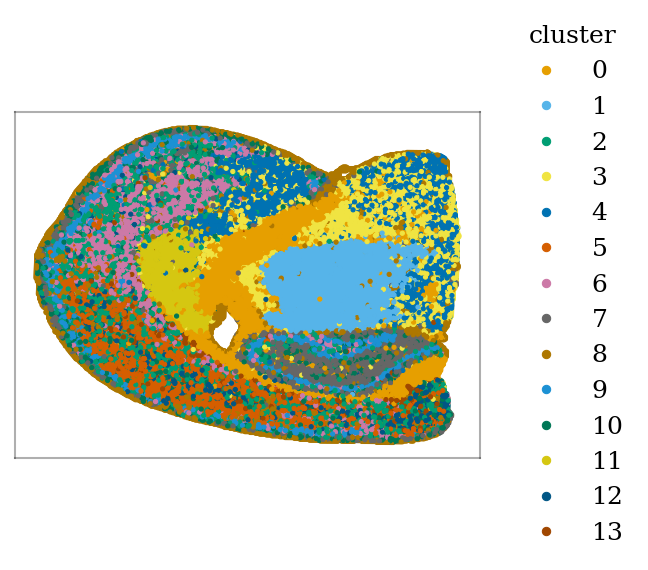

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(4, 3))
vp.plt.plot_spatial_feature(
        andata016_,
        features = 'cluster',
        color = 'cluster',
        ncol = 1,
        image_kwargs=None,
        _ax  = axs,
        )
plt.xticks([])
plt.yticks([])

In [ ]:
sc.pp.neighbors(
    andata016_,
    n_pcs=9,
    use_rep='X_pca',
    method='gauss',
    knn = True,
    n_neighbors=80,
    metric='euclidean',
    key_added='knn'
)

In [65]:
qc_features = ["sum", "detected", "subsets_mito_percent"]
vp.spatial.local_moran(andata016_,feature = qc_features)

AnnData object with n_obs × n_vars = 98917 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'var', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable'
    uns: 'spatial', 'config', 'pca', 'neighbors', 'leiden'
    obsm: 'spatial', 'geometry', 'X_pca', 'local_moran'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [68]:
andata016_.obsm['local_moran']

,sum,detected,subsets_mito_percent
s_016um_00052_00082-1,-0.009493,0.003348,0.205068
s_016um_00150_00268-1,0.608899,0.742563,0.350044
s_016um_00144_00175-1,0.040647,0.116591,0.412807
s_016um_00165_00109-1,0.068643,0.033271,0.053226
s_016um_00297_00147-1,0.366201,0.441432,0.418002
...,...,...,...
s_016um_00109_00223-1,0.959451,1.279099,-0.027854
s_016um_00039_00175-1,0.187636,0.274512,0.204017
s_016um_00037_00193-1,1.205918,1.409671,0.633079
s_016um_00144_00329-1,0.163464,0.279098,0.347172


array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

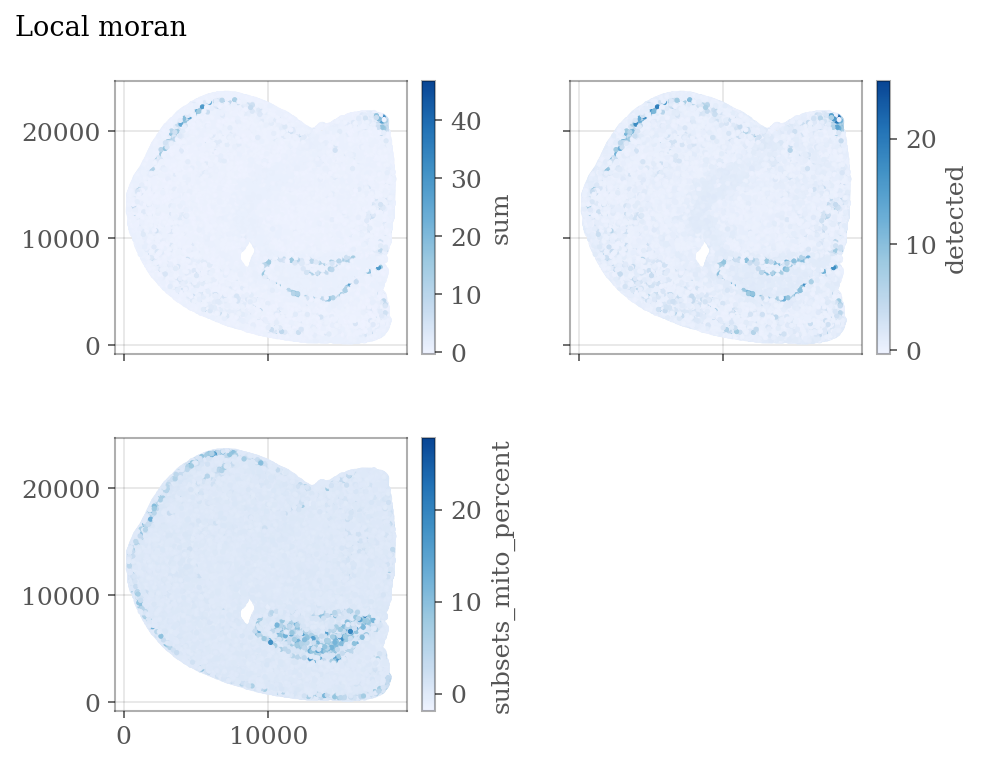

In [74]:
qc_features = ["sum", "detected", "subsets_mito_percent"]
vp.plt.plot_local_result(
        andata016_,
        obsm = 'local_moran',
        features=qc_features,
        )

In [83]:
andata016_

AnnData object with n_obs × n_vars = 98917 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'var', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable'
    uns: 'spatial', 'config', 'pca', 'neighbors', 'leiden'
    obsm: 'spatial', 'geometry', 'X_pca', 'local_moran'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [89]:
andata016_[:,andata016_.var_names=='Mbp']

View of AnnData object with n_obs × n_vars = 98917 × 1
    obs: 'in_tissue', 'array_row', 'array_col', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'var', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable'
    uns: 'spatial', 'config', 'pca', 'neighbors', 'leiden'
    obsm: 'spatial', 'geometry', 'X_pca', 'local_moran'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [90]:
vp.spatial.local_moran(andata016_,feature = ['Mbp','Prkcd','Nrgn'])

AnnData object with n_obs × n_vars = 98917 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'var', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable'
    uns: 'spatial', 'config', 'pca', 'neighbors', 'leiden'
    obsm: 'spatial', 'geometry', 'X_pca', 'local_moran'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [91]:
andata016_.obsm['local_moran']

,sum,detected,subsets_mito_percent,Mbp,Prkcd,Nrgn
s_016um_00052_00082-1,-0.009493,0.003348,0.205068,0.252176,0.077043,0.084807
s_016um_00150_00268-1,0.608899,0.742563,0.350044,-0.106585,0.077657,-0.122760
s_016um_00144_00175-1,0.040647,0.116591,0.412807,-0.031903,7.974432,0.549733
s_016um_00165_00109-1,0.068643,0.033271,0.053226,0.035630,4.026708,0.520210
s_016um_00297_00147-1,0.366201,0.441432,0.418002,5.812545,0.085612,0.428117
...,...,...,...,...,...,...
s_016um_00109_00223-1,0.959451,1.279099,-0.027854,6.901422,0.047349,-0.498740
s_016um_00039_00175-1,0.187636,0.274512,0.204017,0.331689,0.073749,1.534908
s_016um_00037_00193-1,1.205918,1.409671,0.633079,0.142577,0.085612,1.826948
s_016um_00144_00329-1,0.163464,0.279098,0.347172,0.417200,0.079491,1.369675


In [96]:
qc_features = ["Mbp","Prkcd","Nrgn"]
vp.plt.plot_local_result(
        andata016_,
        obsm = 'local_moran',
        features=qc_features,
        )

TypeError: unhashable type: 'Index'

In [93]:
#qc_features = ["sum", "detected", "subsets_mito_percent"]
vp.plt.plot_local_result(
        andata016_,
        obsm = 'local_moran',
        features=['Mbp','Prkcd','Nrgn'],
        )

TypeError: unhashable type: 'Index'